In [1]:
import numpy as np
import pandas as pd
%pylab inline
from datetime import datetime
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading different dataframes and dropping duplicates
accidents_12_14 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)
accidents_09_11 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_05_07 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_12_14 = accidents_12_14.drop_duplicates()
accidents_09_11 = accidents_09_11.drop_duplicates()
accidents_05_07 = accidents_05_07.drop_duplicates()

In [3]:
# Concatenating 3 data frames to a single one
accidents = pd.concat([accidents_05_07, accidents_09_11, accidents_12_14])

In [4]:
# Deleted the column with NO details
accidents.drop('Junction_Detail', axis=1, inplace=True)

# Filling NA values for location as 0.0
accidents['Location_Easting_OSGR'].fillna(0.0, inplace=True)
accidents['Location_Northing_OSGR'].fillna(0.0, inplace=True)
accidents['Longitude'].fillna(0.0, inplace=True)
accidents['Latitude'].fillna(0.0, inplace=True)

In [5]:
# Filling missing values for categorical variables
accidents['Junction_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Human_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Physical_Facilities'].fillna('Unknown', inplace=True)
accidents['Weather_Conditions'].fillna('Unknown', inplace=True)
accidents['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accidents['Special_Conditions_at_Site'].fillna('Unknown', inplace=True)
accidents['Carriageway_Hazards'].fillna('Unknown', inplace=True)
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
accidents['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

In [6]:
# Find the mean value of the Hour in Time colums
t = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
t = t[t != 'nan'].map(int)
int(ceil(t.mean()))

14

In [7]:
# Adding a new column 'hour' and replacing the 'nans' with the mean value
accidents['Hour'] = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
accidents['Hour'].replace('nan', 14, inplace= True)
accidents['Hour'] = accidents['Hour'].map(int)
accidents.drop('Time', inplace=True, axis=1)

In [8]:
# Converting Date column into Date time
accidents['Date'] = pd.to_datetime(accidents['Date'], format = '%d/%m/%Y')

In [9]:
# Function to check if the weather is windy or not
def isWindy(weather):
    if 'with high winds' in weather:
        return 'Yes'
    elif 'without high winds' in weather:
        return 'No'
    else:
        return "Unknown"

In [10]:
# Adding a new column to capture the effect of wind separately
accidents['Wind'] = accidents['Weather_Conditions'].map(isWindy)

In [11]:
# Splitting Weather Conditions and taking the first word. Adding a new column
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].map(lambda x: x.split()[0])
accidents['Weather_Conditions'].replace('Other', 'Unknown', inplace=True)

In [12]:
accidents = accidents.reset_index().drop('index', axis=1)

In [13]:
accidents.shape

(1469995, 33)

In [14]:
accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
1469990,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,2014-12-07,...,Snowing,Snow,None,None,2,Yes,Unknown,2014,22,No
1469991,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,2014-12-11,...,Fine,Snow,None,None,2,Yes,Unknown,2014,6,No
1469992,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,2014-12-09,...,Fine,Frost/Ice,None,None,2,Yes,Unknown,2014,2,No
1469993,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,2014-12-17,...,Raining,Wet/Damp,None,None,2,Yes,Unknown,2014,6,No
1469994,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,2014-12-24,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


In [15]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469995 entries, 0 to 1469994
Data columns (total 33 columns):
Accident_Index                                 1469995 non-null object
Location_Easting_OSGR                          1469995 non-null float64
Location_Northing_OSGR                         1469995 non-null float64
Longitude                                      1469995 non-null float64
Latitude                                       1469995 non-null float64
Police_Force                                   1469995 non-null int64
Accident_Severity                              1469995 non-null int64
Number_of_Vehicles                             1469995 non-null int64
Number_of_Casualties                           1469995 non-null int64
Date                                           1469995 non-null datetime64[ns]
Day_of_Week                                    1469995 non-null int64
Local_Authority_(District)                     1469995 non-null int64
Local_Authority_(Highway)    

In [16]:
# All nulls have been removed
sum(accidents.isna())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [17]:
# converting categorical variables
accidents['Accident_Severity'].replace([1, 2, 3],['Fatal', 'Severe', 'Slight'], inplace=True)
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

In [18]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,Slight,1,1,2005-01-05,...,Fine,Dry,None,None,1,Yes,E01002909,2005,17,No
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,Slight,2,1,2005-01-06,...,Fine,Dry,None,None,1,Yes,E01002857,2005,0,No
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,Slight,1,1,2005-01-07,...,Fine,Dry,None,None,1,Yes,E01002840,2005,10,No
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,Slight,1,1,2005-01-10,...,Fine,Wet/Damp,None,None,1,Yes,E01002863,2005,21,No


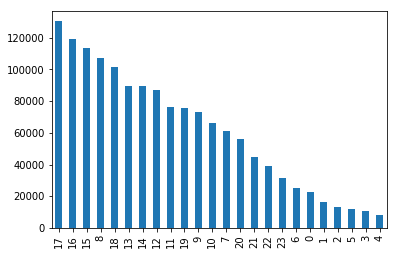

In [19]:
accidents['Hour'].value_counts().plot(kind='bar')

In [20]:
accidents['Year'].value_counts()

2005    198732
2006    189161
2007    182115
2009    163553
2010    154414
2011    151470
2014    146320
2012    145571
2013    138659
Name: Year, dtype: int64

In [21]:
accidents['Year'].value_counts()

2005    198732
2006    189161
2007    182115
2009    163553
2010    154414
2011    151470
2014    146320
2012    145571
2013    138659
Name: Year, dtype: int64

In [22]:
mask_accident_severity = accidents['Accident_Severity'] == 'Slight'
accidents_filtered = accidents[~mask_accident_severity]
accidents_filtered.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,Severe,2,1,2005-01-20,...,Fine,Dry,None,None,1,Yes,E01002864,2005,0,No
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Fine,Dry,None,None,1,Yes,E01002821,2005,3,No
30,200501BS70003,523910.0,181390.0,-0.215545,51.517796,1,Severe,2,2,2005-02-01,...,Raining,Wet/Damp,None,None,1,Yes,E01002878,2005,17,No
52,200501BS70029,524100.0,181830.0,-0.212653,51.521709,1,Severe,1,1,2005-02-15,...,Fine,Dry,None,None,1,Yes,E01002905,2005,18,No


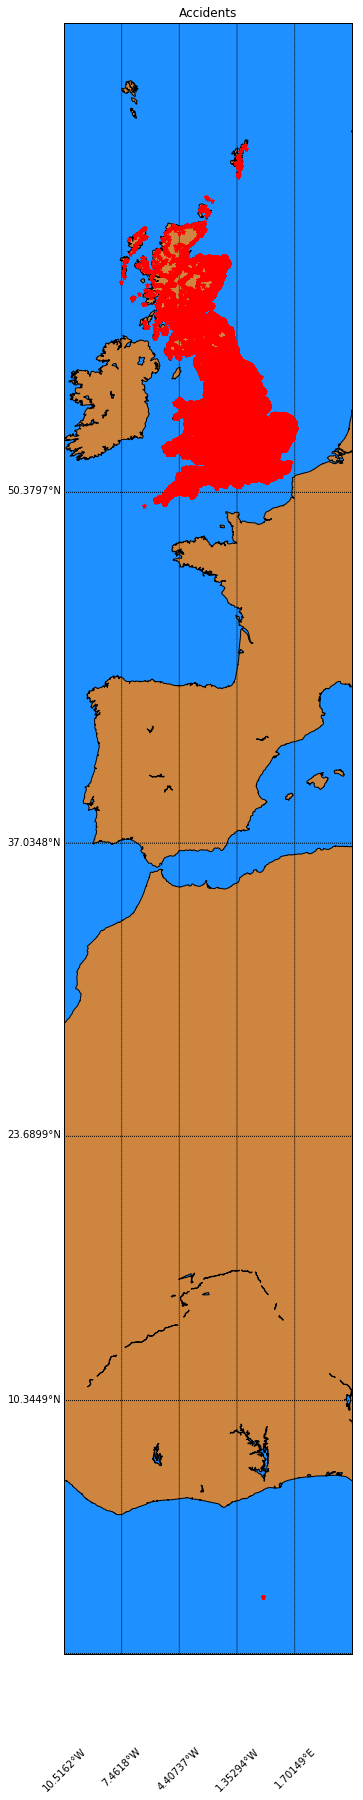

In [37]:
#!/usr/bin/python
import os
os.environ["PROJ_LIB"] = 'C:\Users\Akankshi Mody\Anaconda2\pkgs\proj4-5.2.0-hc56fc5f_1\Library\share' 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

lats, lons,names,altitude = [],[],[],[]

lats = list(accidents_filtered['Latitude'])
lons = list(accidents_filtered['Longitude'])

# How much to zoom from coordinates (in degrees)
zoom_scale = 3

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(100,30))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Accidents")
plt.savefig('Accidents1.png', format='png', dpi=500)
plt.show()